2018 Edition

# Challenge: What is the future selling price of a home?

A home is often the largest and most expensive purchase a person makes in his or her lifetime. Ensuring homeowners have a trusted way to monitor this asset is incredibly important.

In this competition, students are required to develop a full-fledged approach to make predictions about the future sale prices of homes. A full-fledged approach constist, at least, in the following steps:

* Descriptive statistics about the data
* Data cleaning and pre-processing
* Defining a modeling approach to the problem
* Build such a statistical model
* Validate the outcome of the model

Now, should you ask a home buyer to describe their dream house, they probably wouldn't begin with describing features such as the height of the basement ceiling or the proximity to a railroad. As you will see, the dataset we use in this competition proves that many more features influence price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in a small city in the US, this competition challenges you to predict the final price of each home.

# Goal of the challenge

It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.

## Metric
Notebooks are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

## Submission File Format
The file should contain a header and have the following format:

```
Id,SalePrice
1461,169000.1
1462,187724.1233
1463,175221
etc.
```

You will find an example submission file within the data directory in the repository.

# Grading the notebook

This challenge is going to be graded as a regular notebook for the AML labs. As a consequence, students should submit:

* the html version of the notebook, using the Data Science Labs submission website, as usual [**Assignement: Challenge Notebook**]
* the submission file (in csv format), that we will use to rank students according to the metric defined above, again through the Data Science Labs submission website [**Assignement: Challenge Predictions**]

In summary, you will have to submit 2 files!

### -------------------------------------------------------------------------------------------------------------------------------------------------------------

# Interior
### Basement
BsmtQual: Height of the basement  
BsmtCond: General condition of the basement  
BsmtExposure: Walkout or garden level basement walls  
BsmtFinType1: Quality of basement finished area  
BsmtFinSF1: Type 1 finished square feet  
BsmtFinType2: Quality of second finished area (if present)  
BsmtFinSF2: Type 2 finished square feet  
BsmtUnfSF: Unfinished square feet of basement area  
TotalBsmtSF: Total square feet of basement area  


### Floors
1stFlrSF: First Floor square feet  
2ndFlrSF: Second floor square feet  
LowQualFinSF: Low quality finished square feet (all floors)  
GrLivArea: Above grade (ground) living area square feet  

### Bathroom
BsmtFullBath: Basement full bathrooms  
BsmtHalfBath: Basement half bathrooms  
FullBath: Full bathrooms above grade  
HalfBath: Half baths above grade

### Rooms
Bedroom: Number of bedrooms above basement level  
Kitchen: Number of kitchens  
KitchenQual: Kitchen quality  
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

# Architectural & Structural
MSSubClass: The building class  
BldgType: Type of dwelling  
HouseStyle: Style of dwelling  
OverallQual: Overall material and finish quality  
OverallCond: Overall condition rating  
YearBuilt: Original construction date  
YearRemodAdd: Remodel date  
Functional: Home functionality rating  
Foundation: Type of foundation  

#  Exterior
RoofStyle: Type of roof  
RoofMatl: Roof material  
Exterior1st: Exterior covering on house  
Exterior2nd: Exterior covering on house (if more than one material)  
MasVnrType: Masonry veneer type  
MasVnrArea: Masonry veneer area in square feet  
ExterQual: Exterior material quality  
ExterCond: Present condition of the material on the exterior  
### Garage
GarageType: Garage location  
GarageYrBlt: Year garage was built  
GarageFinish: Interior finish of the garage  
GarageCars: Size of garage in car capacity  
GarageArea: Size of garage in square feet  
GarageQual: Garage quality  
GarageCond: Garage condition  
  
WoodDeckSF: Wood deck area in square feet  

OpenPorchSF: Open porch area in square feet  
EnclosedPorch: Enclosed porch area in square feet  
3SsnPorch: Three season porch area in square feet  
ScreenPorch: Screen porch area in square feet  

PoolArea: Pool area in square feet  
PoolQC: Pool quality  

Fence: Fence quality  

# Location
MSZoning: The general zoning classification  
Neighborhood: Physical locations within Ames city limits  
Condition1: Proximity to main road or railroad  
Condition2: Proximity to main road or railroad (if a second is present)  
## Land
LandContour: Flatness of the property  
LandSlope: Slope of property  

## Lot
LotFrontage: Linear feet of street connected to property  
LotArea: Lot size in square feet  
LotShape: General shape of property  
LotConfig: Lot configuration  

## Access
Street: Type of road access  
Alley: Type of alley access  
PavedDrive: Paved driveway  

# Utilities
Utilities: Type of utilities available
Heating: Type of heating   
HeatingQC: Heating quality and condition  
CentralAir: Central air conditioning  
Electrical: Electrical system  
Fireplaces: Number of fireplaces  
FireplaceQu: Fireplace quality  

# Miscellaneous
MiscFeature: Miscellaneous feature not covered in other categories  
MiscVal: Value (in dollars) of miscellaneous feature  
MoSold: Month Sold  
YrSold: Year Sold  
SaleType: Type of sale  
SaleCondition: Condition of sale  

In [5]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data
FILE_TRAIN = './challenge_data/train.csv'

df_train = pd.read_csv(FILE_TRAIN)

nrow = df_train.shape[0]

First, we need to check missing value of the data set. Assume that we can remove those variables which have more than 15% missing value, so `PoolQC`, `MiscFeature`, `Alley`, `Fence`, `LotFrontage`. We don't remove `FireplaceQu` because NA value mean there is no fireplace, so it is actually not missing value.

In [3]:
# check missing value with total number and percentage
missing_count = (nrow - df_train.count())
missing_per = (1 - df_train.count()/nrow)
missing = pd.concat([missing_count, missing_per], axis=1, keys=['Total', 'Percent']).sort_values(by='Total', ascending=False)
missing[missing['Total'] > 0]

,Total,Percent
PoolQC,1196,0.996667
MiscFeature,1153,0.960833
Alley,1125,0.937500
Fence,973,0.810833
FireplaceQu,564,0.470000
LotFrontage,210,0.175000
GarageYrBlt,67,0.055833
GarageFinish,67,0.055833
GarageType,67,0.055833
GarageQual,67,0.055833


### Dealing with missing value

In [18]:
# The missing value in garage variables means no garage. So replace NA value with NoGarage
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df_train[col] = df_train[col].fillna('None')
# Using 0 for the year value
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(0)

# BsmtQual: NA value means no Basement
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_train[col] = df_train[col].fillna('None')


# 1. Descriptive analysis 

Let's take a look at our data and make descriptive analysis to understand the variables and the `SalePrice` which we want to predict.

## 1.1 SalePrice

First, plot the historam of SalePrice with the kernel density estimate. The data is heavily right skewed, so the mean will be larger than the median. The boxplot shows that there are many outliers lying in the right of the historam. 

To make thing more easier, we can transform `SalePrice` using log transform. It help to reduce the value and skewness of data so that the patterns in the data will be more interpretable and meet the assumptions of inferential statistics. The historam and kernel estimation of log transform looks more normal!

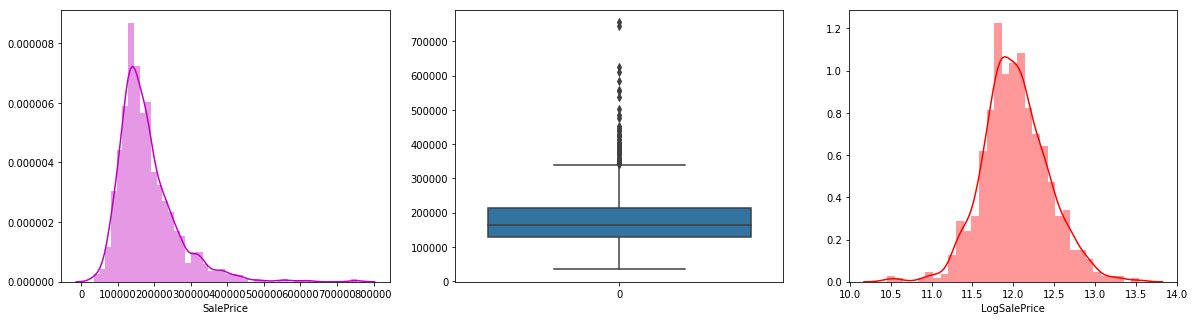

In [6]:
plt.subplots(figsize =(20, 5))

# historam
plt.subplot(1, 3, 1)
sns.distplot(df_train['SalePrice'], color='m');

# boxplot
plt.subplot(1, 3, 2)
sns.boxplot(data=df_train['SalePrice']);

# log transformation
df_train["LogSalePrice"] = np.log(df_train['SalePrice'])
# historam of log
plt.subplot(1, 3, 3)
sns.distplot(df_train['LogSalePrice'], color='r');

In [7]:
# simple statistics
df_train[["SalePrice", "LogSalePrice"]].describe()

,SalePrice,LogSalePrice
count,1200.000000,1200.000000
mean,181414.628333,12.024861
std,81070.908544,0.403556
min,34900.000000,10.460242
25%,129900.000000,11.774520
50%,163700.000000,12.005790
75%,214000.000000,12.273731
max,755000.000000,13.534473


Next, we analysis predictor variables. To make thing easier to analysis, we split the predictor variables into different categories. So in each category, we do analysis for each variable, and evaluate the correlation between them. In this work, we group variables based on the description of them.

## 1.2 Interior

### 1.2.1 Basement
#### BsmtQual
The quality (height) of the basement.  
- Ex: Excellent (100+ inches)	 
- Gd: Good (90-99 inches)  
- TA: Typical (80-89 inches)  
- Fa: Fair (70-79 inches)  
- Po: Poor (<70 inches)  
- None: No Basement  

The graph shows that there are no instance for Poor `BsmtQual`. While Gd, TA and Ex basements are generally more expensive depending on the height of basement, the house with no basement and Fair height basement seems not be differents. Another notice is that the exellent basement has greater deviation than the others.

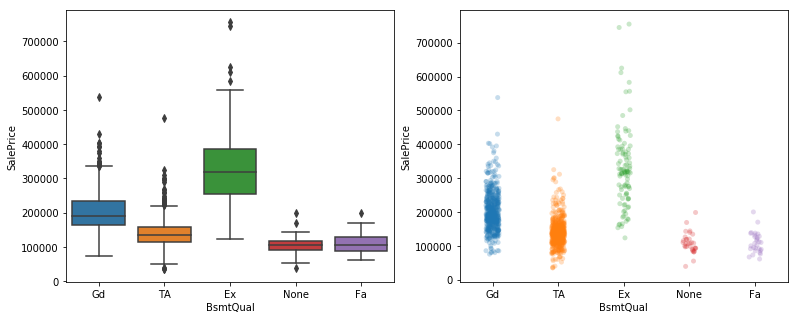

In [15]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="BsmtQual", y="SalePrice", data=df_train)

plt.subplot(1, 3, 2)
sns.stripplot(x="BsmtQual", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);

#### BsmtCond
General condition of the basement  
- Ex: Excellent  
- Gd: Good  
- TA: Typical - slight dampness allowed  
- Fa: Fair - dampness or some cracking or settling  
- Po: Poor - Severe cracking, settling, or wetness  
- None: No Basement  

There are no excellent basement in term of general condition. The most popular is Typical condition basement and minimal number of Poor condition basement. There many houses that were priced unexpectedly high in Typical condition basement line.

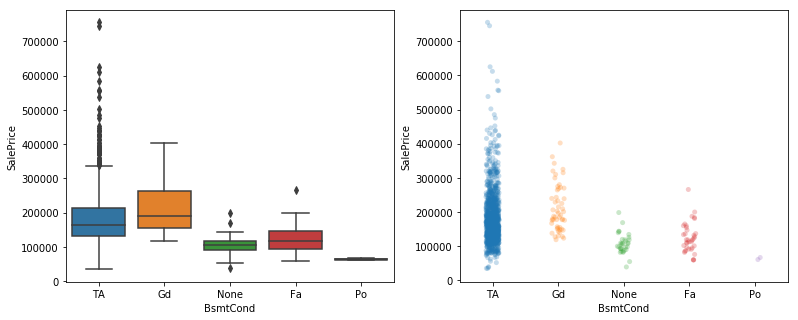

In [17]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="BsmtCond", y="SalePrice", data=df_train)

plt.subplot(1, 3, 2)
sns.stripplot(x="BsmtCond", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);

#### BsmtExposure
Refers to walkout or garden level walls  
- Gd: Good Exposure
- Av: Average Exposure (split levels or foyers typically score average or above)	
- Mn: Mimimum Exposure
- No: No Exposure
- None: No Basement

As expected, the values of None are minor group as observed in previous features. The most widespread type of basement is no expusure, but the Good Exposure basemenet had little bit higher price than the others.

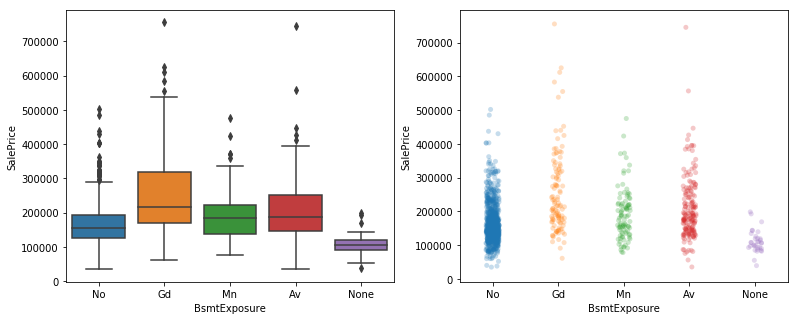

In [19]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="BsmtExposure", y="SalePrice", data=df_train)

plt.subplot(1, 3, 2)
sns.stripplot(x="BsmtExposure", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);

#### BsmtFinType1
Quality of basement finished area  
- GLQ: Good Living Quarters
- ALQ: Average Living Quarters
- BLQ: Below Average Living Quarters	
- Rec: Average Rec Room
- LwQ: Low Quality
- Unf: Unfinshed
- None: No Basement

The figures show that the basement Good type had better price while the others, except no basement, had quite near median values. Indeed, the unfinished basement had higher median. Again the no basement houses were the lowest price group.

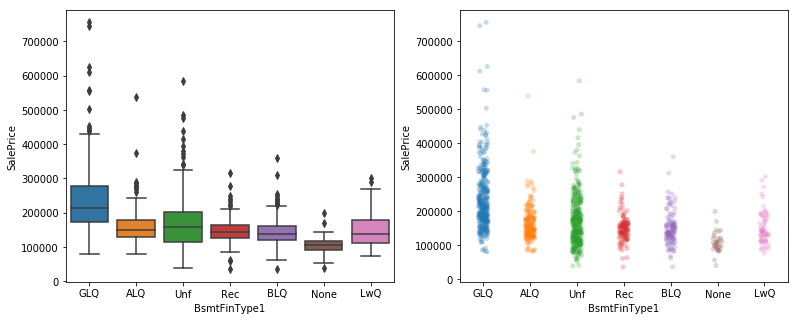

In [20]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="BsmtFinType1", y="SalePrice", data=df_train)

plt.subplot(1, 3, 2)
sns.stripplot(x="BsmtFinType1", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);

#### BsmtFinSF1
Type 1 finished square feet  

The boxplot demonstrate that 50% of houses had smaller than around 750 ft<sup>2</sup>. That means it seems the houses with the basement greater than around 1850 ft<sup>2</sup> were exceptional.

In the scatter plot, except no basement, the sale price of a house was depend on the area of the basement.

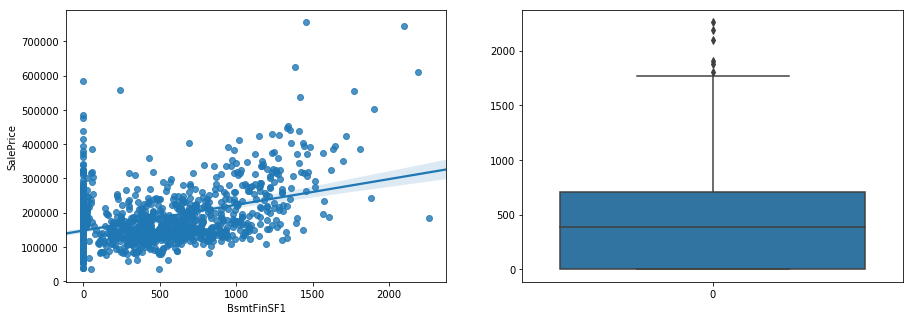

In [21]:
plt.subplots(figsize = (15, 5))

# scatter plot with regression line for SalePrice
plt.subplot(1, 2, 1)
sns.regplot(x="BsmtFinSF1", y="SalePrice", data=df_train);

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_train['BsmtFinSF1']);

#### BsmtFinType2
Quality of second finished area (if present)  
- GLQ: Good Living Quarters
- ALQ: Average Living Quarters
- BLQ: Below Average Living Quarters	
- Rec: Average Rec Room
- LwQ: Low Quality
- Unf: Unfinshed
- None: No Basement

The figures gives that most of houses had not the second basement and if their had, the price of houses depends on the quality of finished area and the relationship are similar to the `BsmtFinType1`.

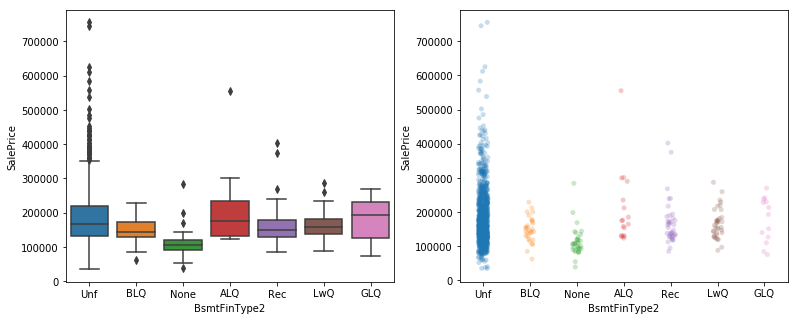

In [22]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="BsmtFinType2", y="SalePrice", data=df_train)

plt.subplot(1, 3, 2)
sns.stripplot(x="BsmtFinType2", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);

#### BsmtFinSF2
Type 2 finished square feet  

Since most of houses had no second basement. The boxplot is not meaningful. In the scatter plot, if the houses that had no second basement are excluded, the regression line will slightly go up when the area of the second basement are go up.

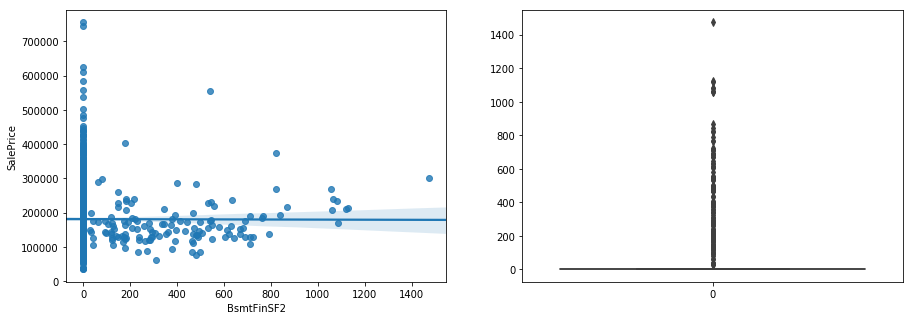

In [24]:
plt.subplots(figsize = (15, 5))

# scatter plot with regression line for SalePrice
plt.subplot(1, 2, 1)
sns.regplot(x="BsmtFinSF2", y="SalePrice", data=df_train);

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_train['BsmtFinSF2']);

#### BsmtUnfSF
Unfinished square feet of basement area  

The unfinished basement area also had relationship with the sale price of a house. The median of unfinished area were approximate 500 ft<sup>2</sup> and 50% of houses had between 250 and 800 ft<sup>2</sup> of unfinished basement.

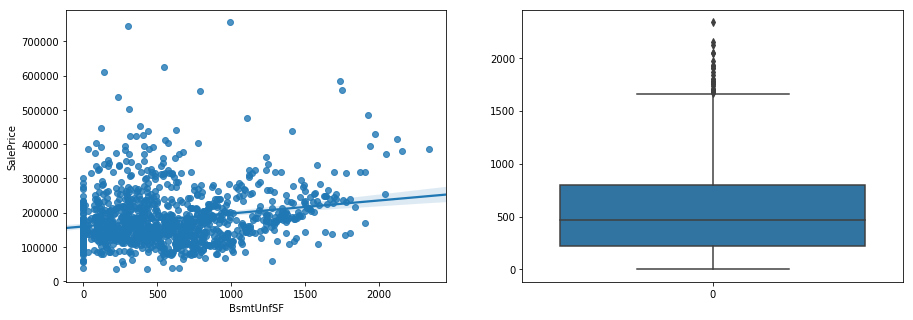

In [25]:
plt.subplots(figsize = (15, 5))

# scatter plot with regression line for SalePrice
plt.subplot(1, 2, 1)
sns.regplot(x="BsmtUnfSF", y="SalePrice", data=df_train);

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_train['BsmtUnfSF']);

### TotalBsmtSF
Total square feet of basement area

The figures shows clear relationship between the area of basement to the sale price. Generally, the larger basement, the higher price.

50% of houses had from 800 to 1300 ft<sup>2</sup> basement and the median is around 1050.

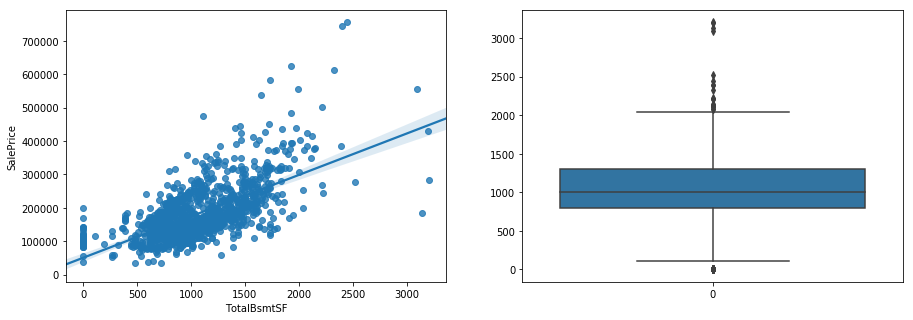

In [26]:
plt.subplots(figsize = (15, 5))

# scatter plot with regression line for SalePrice
plt.subplot(1, 2, 1)
sns.regplot(x="TotalBsmtSF", y="SalePrice", data=df_train);

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_train['TotalBsmtSF']);

### 1.2.2 Floors
#### 1stFlrSF
First Floor square feet

As the area of the first floor rises, the sale price also increases as well. Notice that there are no house that has zero ft<sup>2</sup>, differened from the other numeric area measures which usually contains a lot of zeros. The median valued at 1150 and the maximum value that can be considered as not an outlier is 2200.

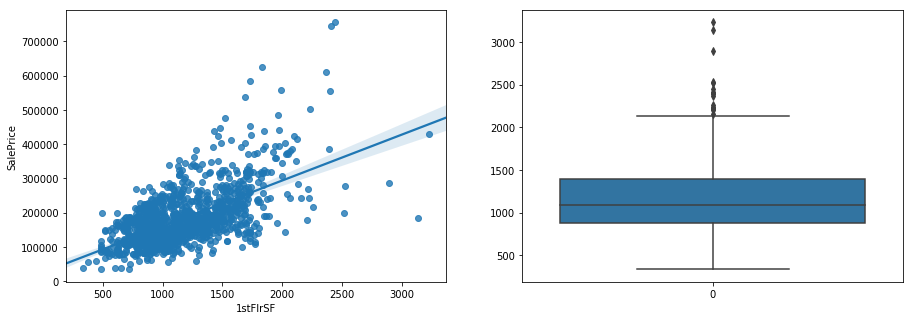

In [27]:
plt.subplots(figsize = (15, 5))

# scatter plot with regression line for SalePrice
plt.subplot(1, 2, 1)
sns.regplot(x="1stFlrSF", y="SalePrice", data=df_train);

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_train['1stFlrSF']);

#### 2ndFlrSF
Second floor square feet  

It is obvious that not all houses has a second floor. In general, the price of house goes up when the area of the second floor area increase. However, it seems that the price does not increase linearly, but somewhat exponentially.

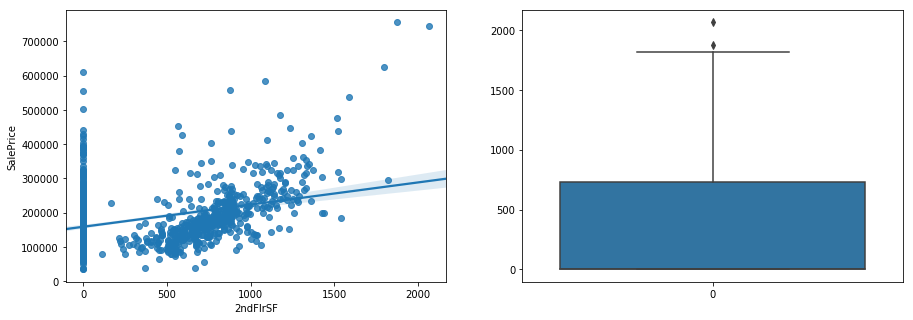

In [28]:
plt.subplots(figsize = (15, 5))

# scatter plot with regression line for SalePrice
plt.subplot(1, 2, 1)
sns.regplot(x="2ndFlrSF", y="SalePrice", data=df_train);

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_train['2ndFlrSF']);

#### LowQualFinSF
Low quality finished square feet (all floors)

The regression line are slightly go down when the area of low quality finising increases. It can be explained since that the larger low quality area makes the house less value.

The boxplot show that the houses which has low quality area are exceptional.

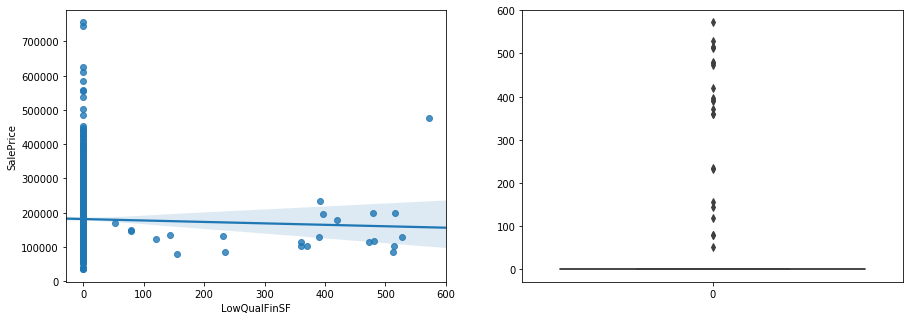

In [29]:
plt.subplots(figsize = (15, 5))

# scatter plot with regression line for SalePrice
plt.subplot(1, 2, 1)
sns.regplot(x="LowQualFinSF", y="SalePrice", data=df_train);

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_train['LowQualFinSF']);

#### GrLivArea
Above grade (ground) living area square feet

It can be noticed that the shape of below scatter plot are quite similar to the `1stFlrSF`.

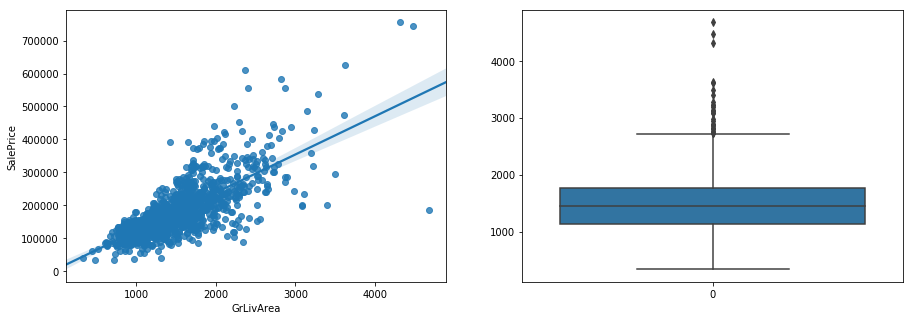

In [30]:
plt.subplots(figsize = (15, 5))

# scatter plot with regression line for SalePrice
plt.subplot(1, 2, 1)
sns.regplot(x="GrLivArea", y="SalePrice", data=df_train);

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_train['GrLivArea']);

### 1.2.3 Bathroom
#### BsmtFullBath
Basement full bathrooms  

Most of basement has zero or one full bathroom. Fews has 2 or 3 full bathrooms. The sale price will be influenced by this feature. The median of zero, one, two ,three full bath room in basement are 160k, 185k, 200k and 195k respectively.

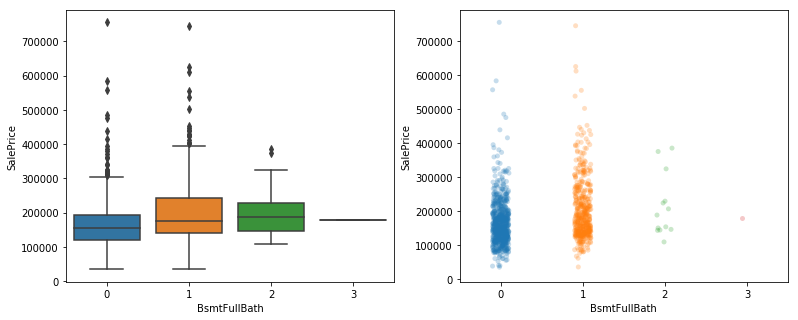

In [32]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="BsmtFullBath", y="SalePrice", data=df_train)

plt.subplot(1, 3, 2)
sns.stripplot(x="BsmtFullBath", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);

#### BsmtHalfBath
Basement half bathrooms

Zero is the popular value in `BsmtHalfBath` feature, because the houses which has no basement also has no bath rooms in basement. Noticeably, the number of half bath in basement e seems has no or minimal effect on sale price of a house.

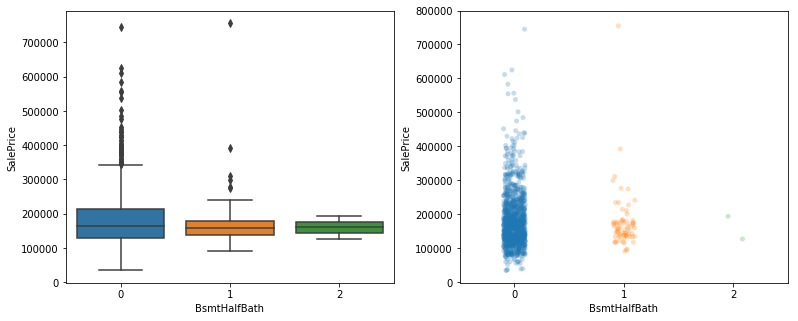

In [33]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="BsmtHalfBath", y="SalePrice", data=df_train)

plt.subplot(1, 3, 2)
sns.stripplot(x="BsmtHalfBath", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);

#### FullBath
Full bathrooms above grade.

It is reasonable that full bathrooms are placed above the basement and they usually has 1 or 2 full bathrooms as shown in below figures. The price of a house is highly influenced by the number of full bathrooms, but no bathroom or one bathroom are not quite different. 

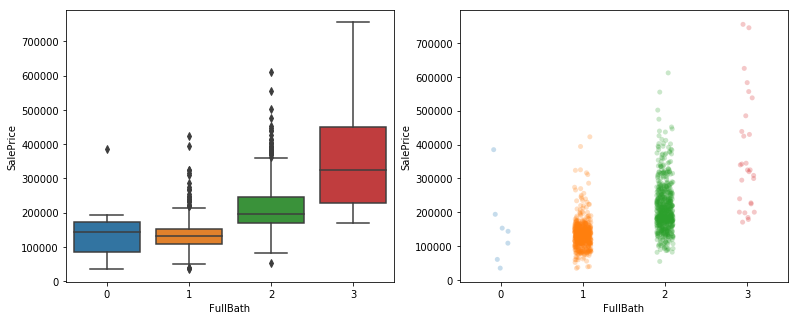

In [35]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="FullBath", y="SalePrice", data=df_train)

plt.subplot(1, 3, 2)
sns.stripplot(x="FullBath", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);

#### HalfBath
Half baths above grade

The images illustrates that the most well-liked number of half bath are 0 or 1, while 2 is rare. The houses which has a half bathroom will have higher price, 50k, compared to zero ones.

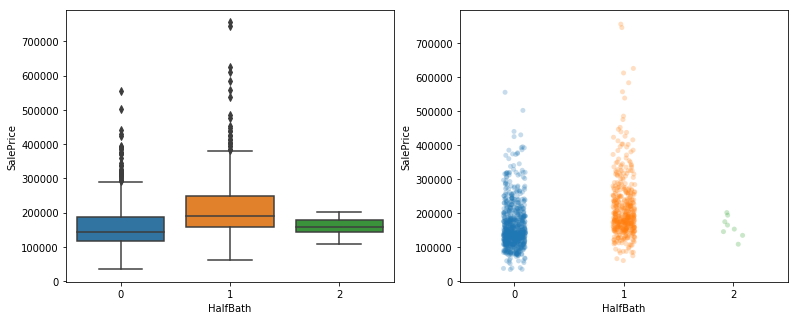

In [38]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="HalfBath", y="SalePrice", data=df_train)

plt.subplot(1, 3, 2)
sns.stripplot(x="HalfBath", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);

### 1.2.4 Rooms
#### BedroomAbvGr
Number of bedrooms above basement level  

The below figures gives out some information. The most popular number of rooms in a house are 2 and 3, but the price are not linear as expected. It may be affected by some other features.

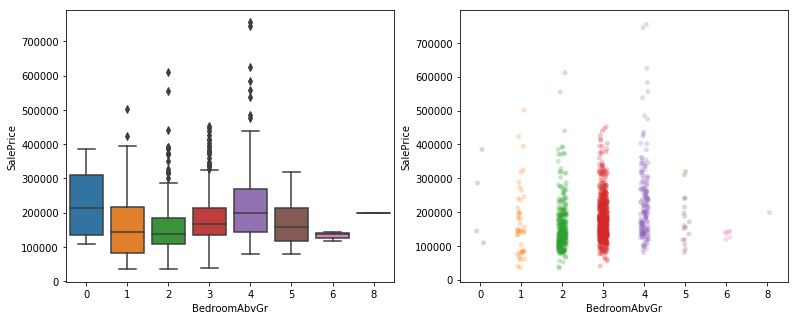

In [43]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="BedroomAbvGr", y="SalePrice", data=df_train)

plt.subplot(1, 3, 2)
sns.stripplot(x="BedroomAbvGr", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);

#### KitchenAbvGr
Number of kitchens  

This feature seems not quite useful since the values are nearly always 1. It is quite reasonable since people need only one kitchen in a house.

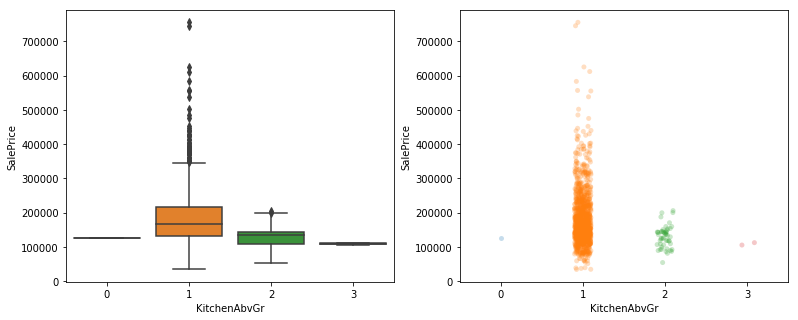

In [44]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="KitchenAbvGr", y="SalePrice", data=df_train)

plt.subplot(1, 3, 2)
sns.stripplot(x="KitchenAbvGr", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);

#### KitchenQual
Kitchen quality  
- Ex: Excellent
- Gd: Good
- TA: Typical/Average
- Fa: Fair
- Po: Poor

While the number of kitchen is dominated by single value, the quality of the kitchen stretch out a bit. There are no Poor quality kitchen and the common qualities are Average and Good. The `KitchenQual` probably has high influence on the sale price.

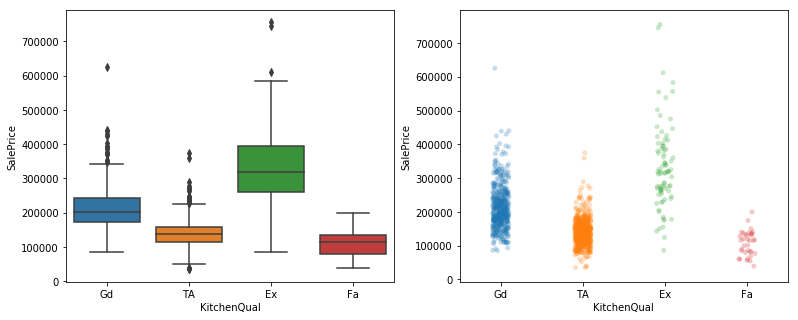

In [45]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="KitchenQual", y="SalePrice", data=df_train)

plt.subplot(1, 3, 2)
sns.stripplot(x="KitchenQual", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);

#### TotRmsAbvGrd
Total rooms above grade (does not include bathrooms)

This feature has a good spread on different categorical values and has highly impact on the sale price. We can see that the price of a house increases when the number of rooms increases.

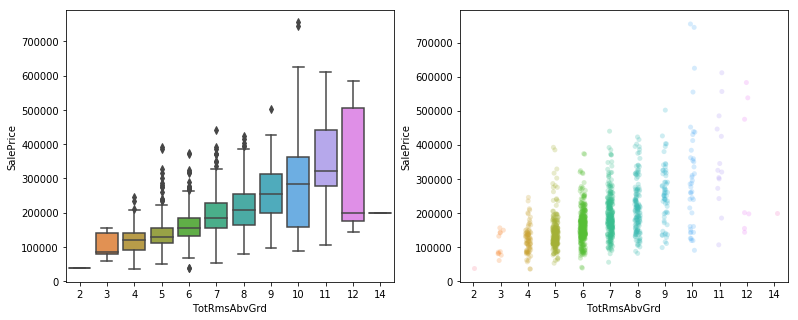

In [46]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="TotRmsAbvGrd", y="SalePrice", data=df_train)

plt.subplot(1, 3, 2)
sns.stripplot(x="TotRmsAbvGrd", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);

## 1.x Garage

### GarageType

Garage location.  
Using box plot and strip plot to see the difference between garage type. The figures show that `builtin` and `attached` have larger mean than the others and have many extreme values. `Detached` has a small range of value compared to `attached` and `builtin`. The other types have too small number of records to be significant.

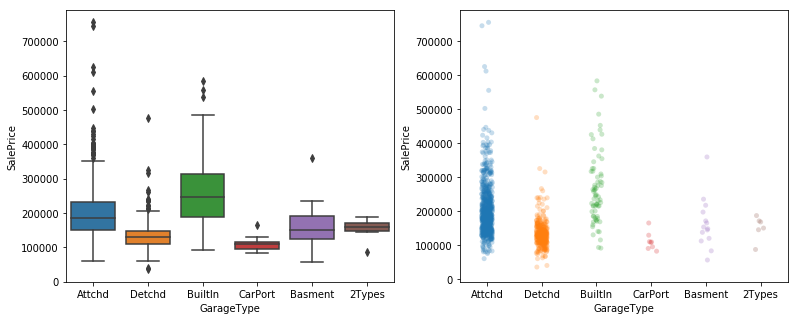

In [8]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="GarageType", y="SalePrice", data=df_train)

plt.subplot(1, 3, 2)
sns.stripplot(x="GarageType", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);


In [9]:
df_train["GarageType"].describe()

count       1133
unique         6
top       Attchd
freq         718
Name: GarageType, dtype: object

### GarageYrBlt

Year garage was built.
We can see that there is an increasing trend over years. Not just the mean value, the variance of price also has the increasing trend.

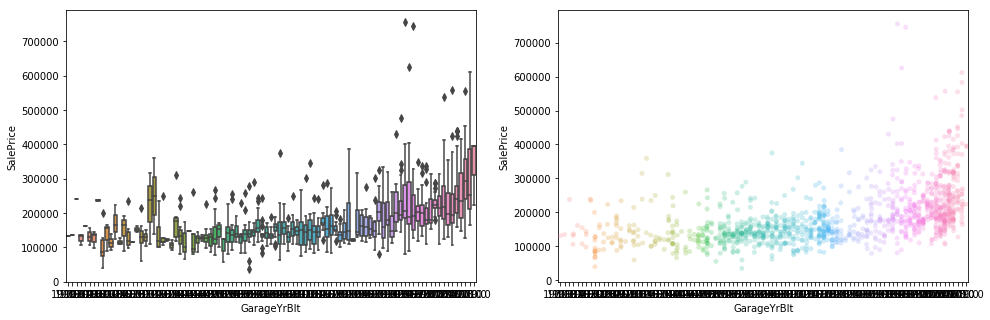

In [11]:
plt.subplots(figsize =(25, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="GarageYrBlt", y="SalePrice", data=df_train)

plt.subplot(1, 3, 2)
sns.stripplot(x="GarageYrBlt", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);


### GarageFinish

Interior finish of the garage.  
There is a clear difference between `Finished`, `RoughFinished` with the others.

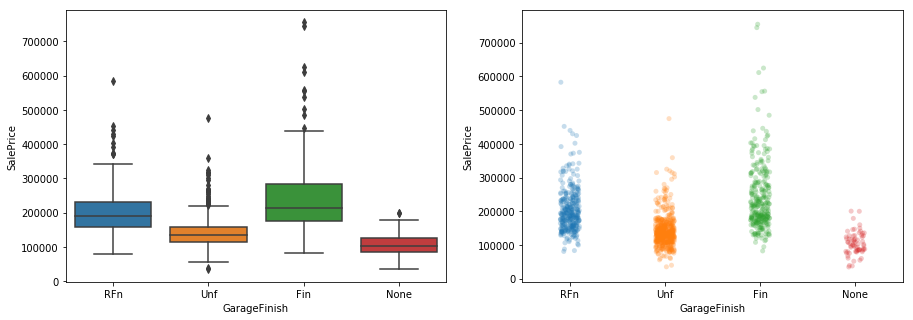

In [20]:
plt.subplots(figsize =(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="GarageFinish", y="SalePrice", data=df_train)

plt.subplot(1, 2, 2)
sns.stripplot(x="GarageFinish", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);


### GarageCars

Size of garage in car capacity.  
The figures show that the price increases when there is more capacity.

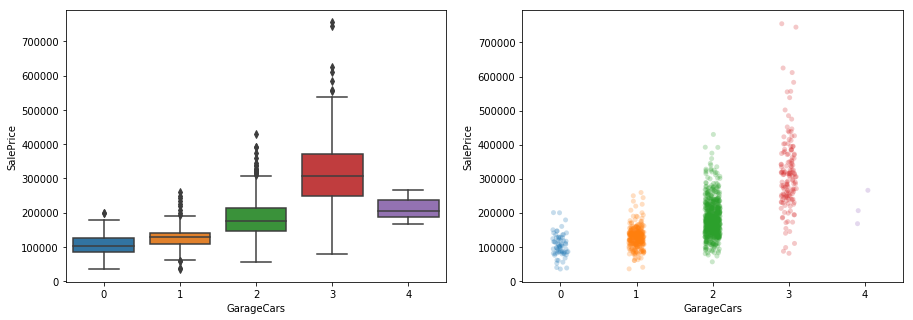

In [19]:
plt.subplots(figsize =(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="GarageCars", y="SalePrice", data=df_train)

plt.subplot(1, 2, 2)
sns.stripplot(x="GarageCars", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);


### GarageArea

Size of garage in square feet.
First, look at scatter plot, we can see a correlation between `GarageArea` and `SalePrice`. The box plot shows distribution of `GarageArea`. With both figures, we can remove three outlier on the bottom left of the scatter plot!

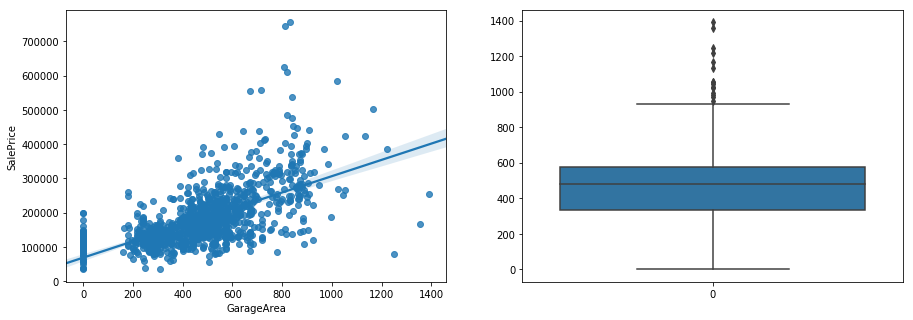

In [27]:
plt.subplots(figsize = (15, 5))

# scatter plot with regression line for SalePrice
plt.subplot(1, 2, 1)
sns.regplot(x="GarageArea", y="SalePrice", data=df_train);

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_train['GarageArea']);


### GarageQual [X]

Garage quality.  
There is not much information in this variable. Most garages are on `Typical/Average` group.

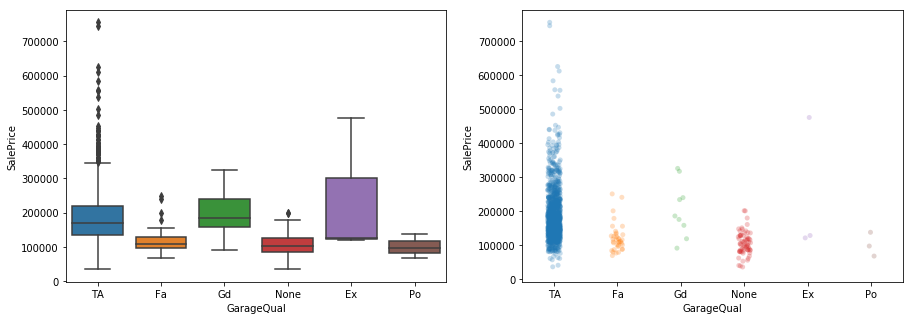

In [29]:
plt.subplots(figsize =(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="GarageQual", y="SalePrice", data=df_train)

plt.subplot(1, 2, 2)
sns.stripplot(x="GarageQual", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);


### GarageCond [X]

Garage condition is the same as above.

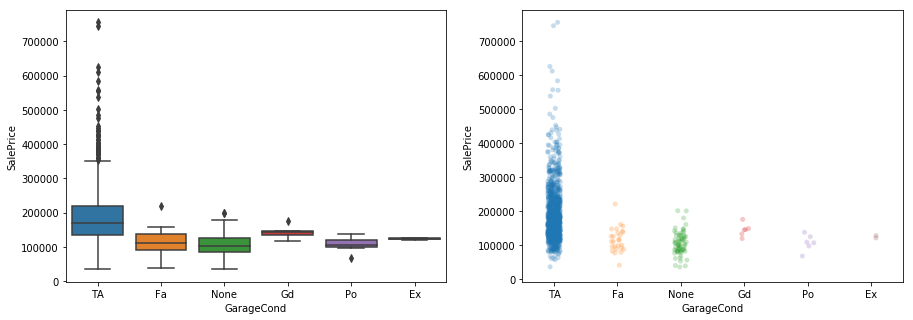

In [31]:
plt.subplots(figsize =(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="GarageCond", y="SalePrice", data=df_train)

plt.subplot(1, 2, 2)
sns.stripplot(x="GarageCond", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);


## 1.x Wood deck and porch [x]

### WoodDeckSF

Wood deck area in square feet.  
There is a slightly correlation, but it is neglectable.

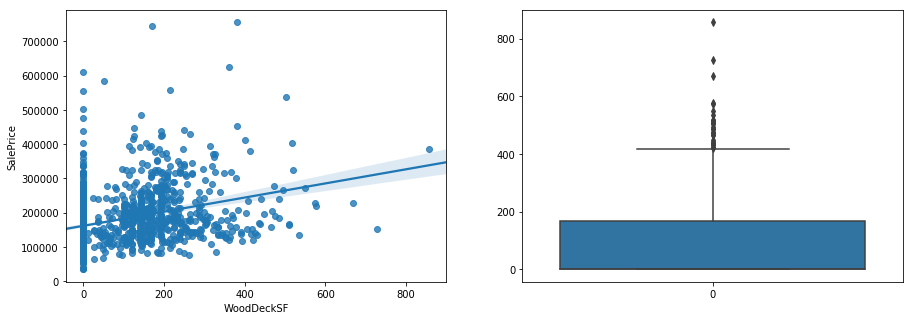

In [32]:
plt.subplots(figsize = (15, 5))

# scatter plot with regression line for SalePrice
plt.subplot(1, 2, 1)
sns.regplot(x="WoodDeckSF", y="SalePrice", data=df_train);

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_train['WoodDeckSF']);


### OpenPorchSF

Open porch area in square feet.

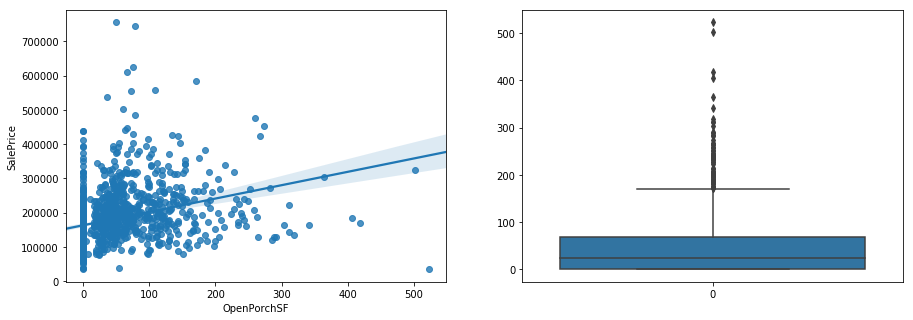

In [40]:
plt.subplots(figsize = (15, 5))

# scatter plot with regression line for SalePrice
plt.subplot(1, 2, 1)
sns.regplot(x="OpenPorchSF", y="SalePrice", data=df_train);

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_train['OpenPorchSF']);


### EnclosedPorch

Enclosed porch area in square feet.

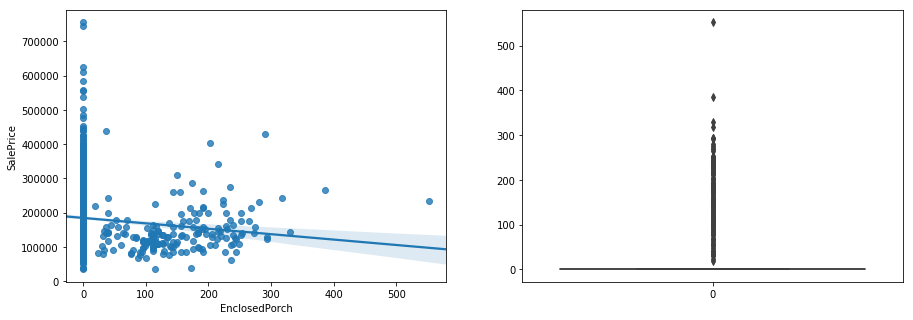

In [42]:
plt.subplots(figsize = (15, 5))

# scatter plot with regression line for SalePrice
plt.subplot(1, 2, 1)
sns.regplot(x="EnclosedPorch", y="SalePrice", data=df_train);

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_train['EnclosedPorch']);


### 3SsnPorch

Three season porch area in square feet.

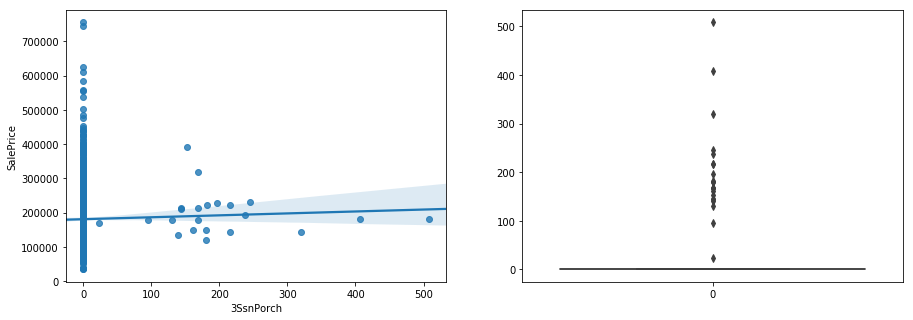

In [41]:
plt.subplots(figsize = (15, 5))

# scatter plot with regression line for SalePrice
plt.subplot(1, 2, 1)
sns.regplot(x="3SsnPorch", y="SalePrice", data=df_train);

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_train['3SsnPorch']);


### ScreenPorch

Screen porch area in square feet.

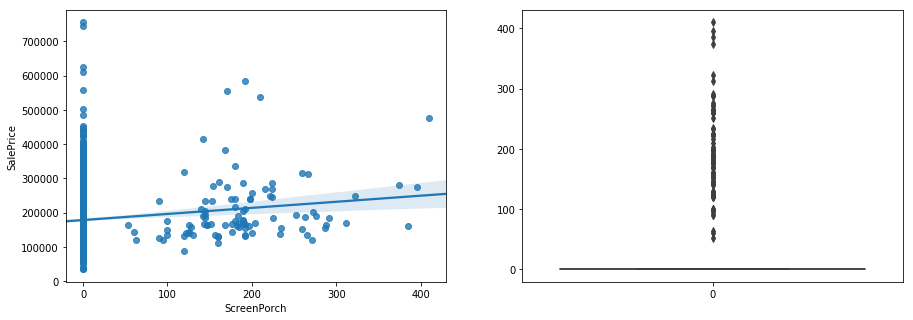

In [43]:
plt.subplots(figsize = (15, 5))

# scatter plot with regression line for SalePrice
plt.subplot(1, 2, 1)
sns.regplot(x="ScreenPorch", y="SalePrice", data=df_train);

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_train['ScreenPorch']);


The porch variables have little information that we can use, so we can remove these variables.

### PoolArea [x]

Pool area in square feet.

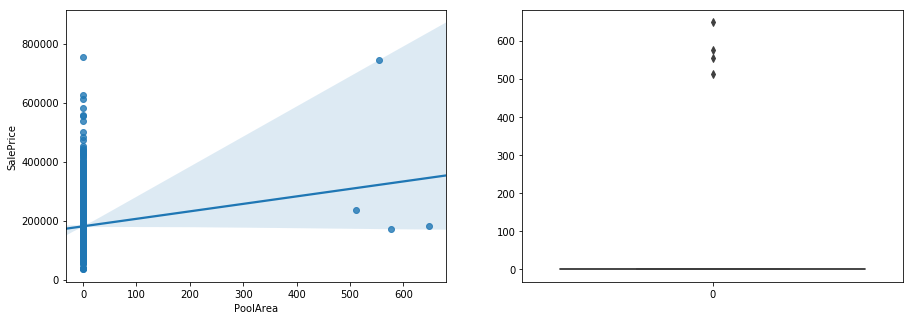

In [44]:
plt.subplots(figsize = (15, 5))

# scatter plot with regression line for SalePrice
plt.subplot(1, 2, 1)
sns.regplot(x="PoolArea", y="SalePrice", data=df_train);

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_train['PoolArea']);


### Fence

There is not much difference between fence quality.

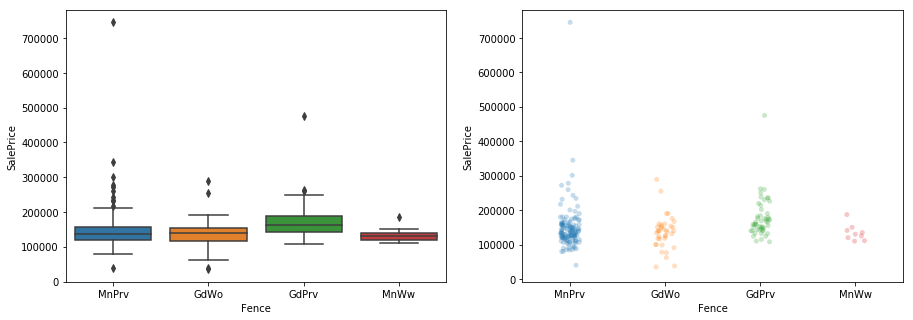

In [46]:
plt.subplots(figsize =(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="Fence", y="SalePrice", data=df_train)

plt.subplot(1, 2, 2)
sns.stripplot(x="Fence", y="SalePrice", data=df_train, size = 5, jitter = True, alpha=.25);
